<a href="https://colab.research.google.com/github/tpessoa-dev/fiap-ml-visao-computacional/blob/master/aula-3-segmentacao/desafio-2/desafio-2-solucao-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio 2

> Atenção: este notebook foi desenhado para funcionar no **Google Colab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-colab```.


Dado uma imagem de captcha (no repositório, “imagens/dots.png”) obtenha o contorno dos caracteres e o exibia na imagem original.

Realize a seguinte ordem: suavização, limiarização, dilatação/erosão, detecção de contornos.
Bônus: use a função de enlaçamento de retângulo para extrair as letras.

![Captcha](https://github.com/tpessoa-dev/fiap-ml-visao-computacional/blob/master/aula-3-segmentacao/desafio-2/imagens/captcha-2.jpg?raw=1)

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [1]:
!rm -rf fiap-ml-visao-computacional/

In [2]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Cloning into 'fiap-ml-visao-computacional'...
remote: Enumerating objects: 11566, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 11566 (delta 58), reused 87 (delta 30), pack-reused 11432
Receiving objects: 100% (11566/11566), 1004.80 MiB | 22.86 MiB/s, done.
Resolving deltas: 100% (509/509), done.
Checking out files: 100% (10577/10577), done.


Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [3]:
%cd fiap-ml-visao-computacional/aula-3-segmentacao/desafio-2/

/content/fiap-ml-visao-computacional/aula-3-segmentacao/desafio-2


Importando as bibliotecas.

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 2. Solução

Carregando a imagem original para a atividade de captcha.

Text(0.5, 1.0, 'Original')

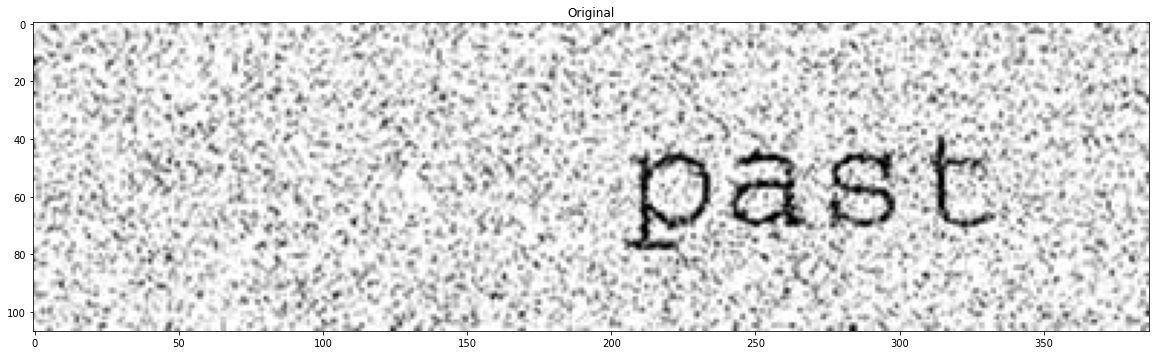

In [5]:
imagem = cv2.imread("imagens/captcha-2.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.imshow(imagem, cmap="gray")
plt.title("Original")

Aplicando suavização para posterior limiarização

Text(0.5, 1.0, 'Suavização')

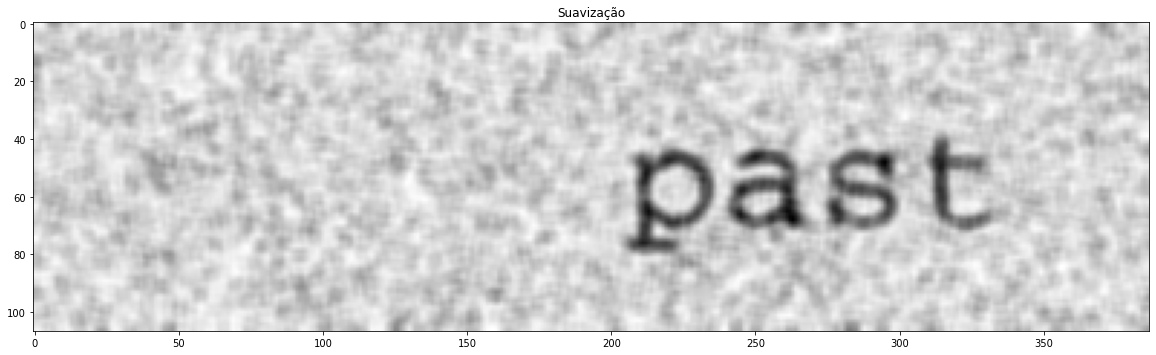

In [6]:
imagem_suav = cv2.blur(imagem, (5, 5))

plt.figure(figsize=(20,10))
plt.imshow(imagem_suav, cmap="gray")
plt.title("Suavização")

Aplicando limiarização para extração de ruídos

Text(0.5, 1.0, 'Limiarizada')

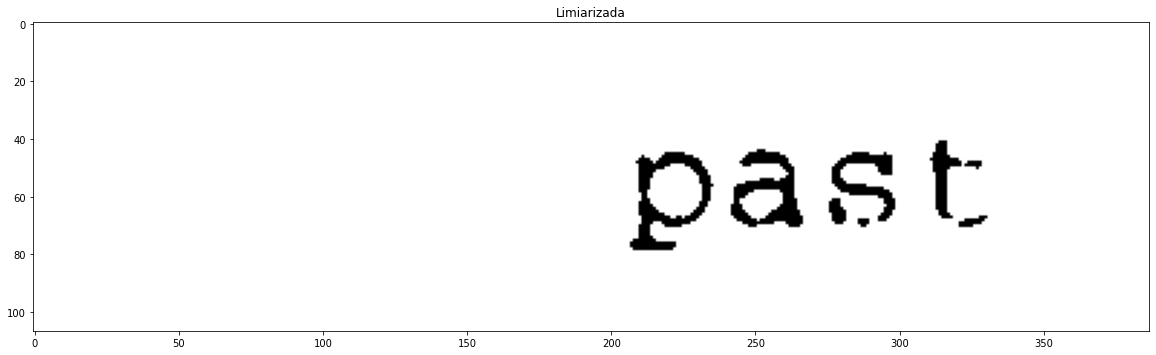

In [7]:
ret, imagem_t = cv2.threshold(imagem_suav, 140, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.imshow(imagem_t, cmap="gray")
plt.title("Limiarizada")

Erodindo para enaltecer as letras. Lembrando que preto é ausência de informação logo, erodir significa abrir e "engrossa" as letras

Text(0.5, 1.0, 'Erodida')

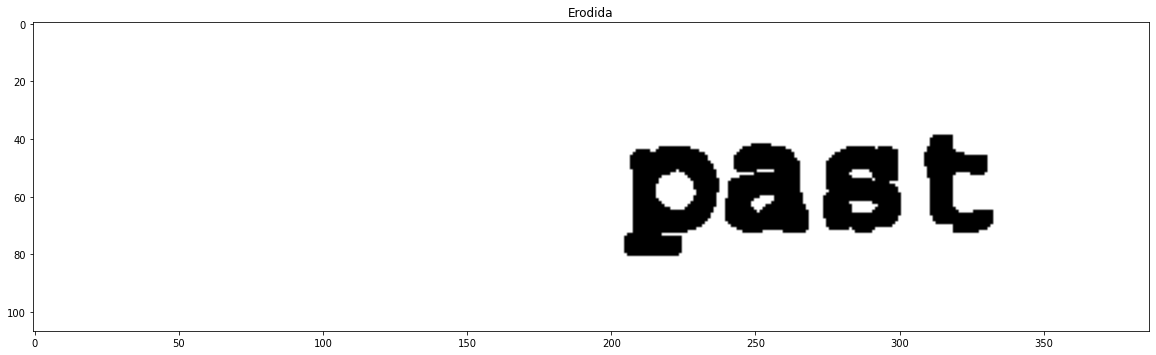

In [8]:
kernel = np.ones((5,5), np.uint8)
imagem_eroded = cv2.erode(imagem_t, kernel, iterations=1)

plt.figure(figsize=(20,10))
plt.imshow(imagem_eroded, cmap="gray")
plt.title("Erodida")

Aplicando filtro Canny para detecção de bordas

Text(0.5, 1.0, 'Bordas')

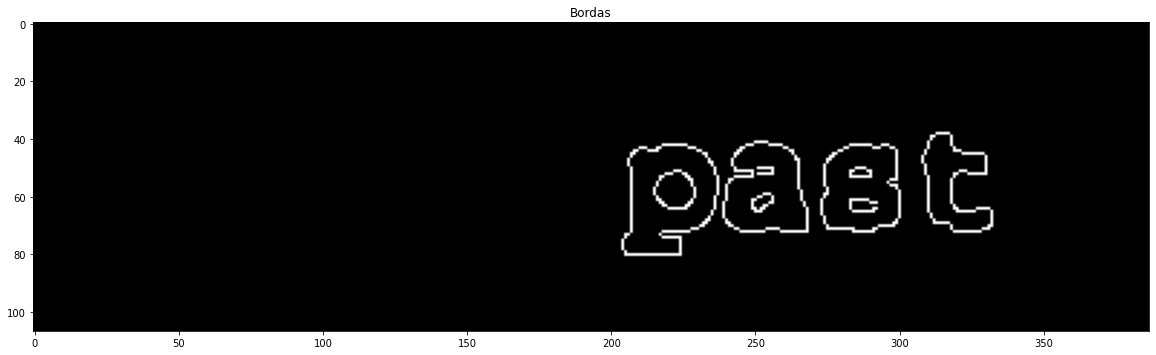

In [9]:
imagem_borda = cv2.Canny(imagem_eroded, 30, 180)

plt.figure(figsize=(20,10))
plt.imshow(imagem_borda, cmap="gray")
plt.title("Bordas")

Dilatando as bordas para melhorar a detecção de contornos

Text(0.5, 1.0, 'Bordas dilatadas')

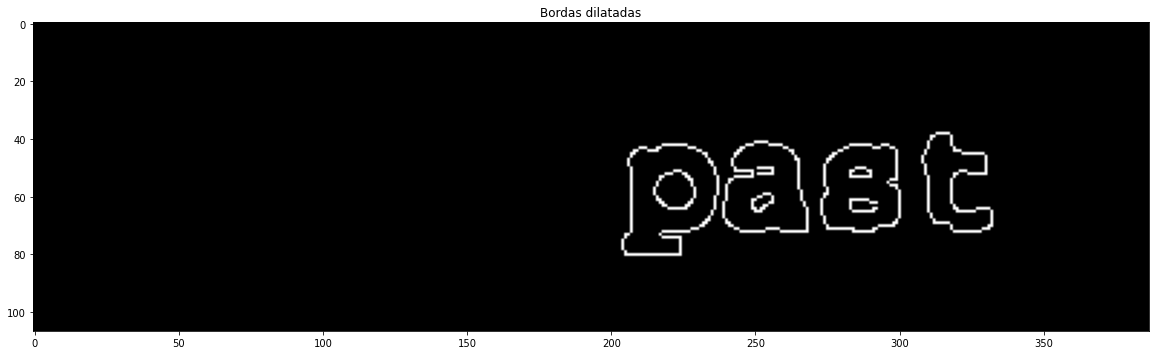

In [10]:
kernel_d = np.ones((1,1), np.uint8)
imagem_dilatada = cv2.dilate(imagem_borda, kernel_d, iterations=1)

plt.figure(figsize=(20,10))
plt.imshow(imagem_dilatada, cmap="gray")
plt.title("Bordas dilatadas")

In [11]:
contours, hierarchy = cv2.findContours(imagem_dilatada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos encontrados "+str(len(contours)))

Contornos encontrados 4


Se fossem encontrados mais do que as 4 letras poderíamos aplicar algum filtro de limite de tamnaho de área

In [12]:
contours_filtered = []
for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > 100:
        contours_filtered.append(contour)
        (x, y, w, h) = cv2.boundingRect(contour)
        print(str(area))
        print((x, y, w, h))
len(contours_filtered)

702.5
(273, 42, 28, 31)
951.0
(204, 42, 34, 39)
718.5
(239, 41, 30, 32)
442.0
(308, 38, 25, 35)


4

Desenhando os contornos na imagem original

Text(0.5, 1.0, 'Bordas dilatadas')

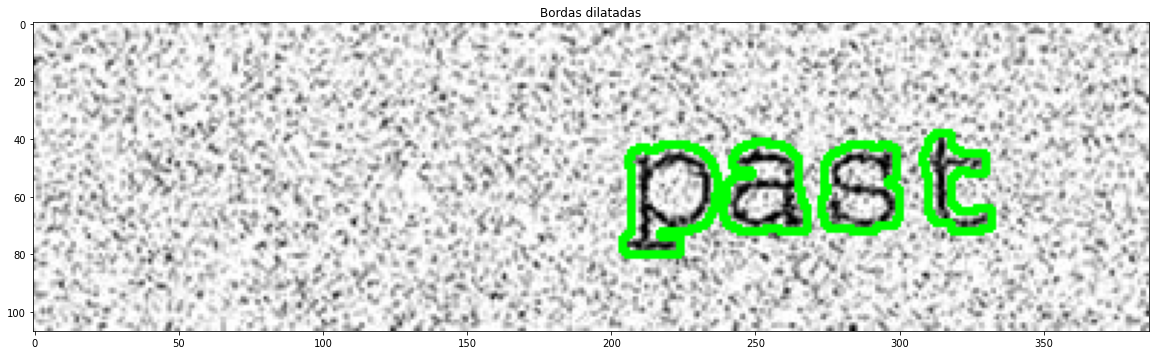

In [13]:
imagem_original = cv2.imread("imagens/captcha-2.jpg")
cv2.drawContours(imagem_original, contours_filtered, -1, (0,255,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(imagem_original, cmap="gray")
plt.title("Bordas dilatadas")

Extraindo letras para eventual treinamento em alguma algoritmo de rede neural, por exemplo

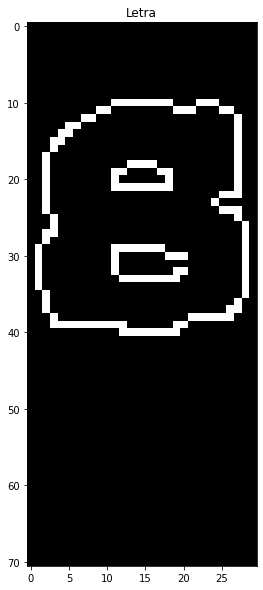

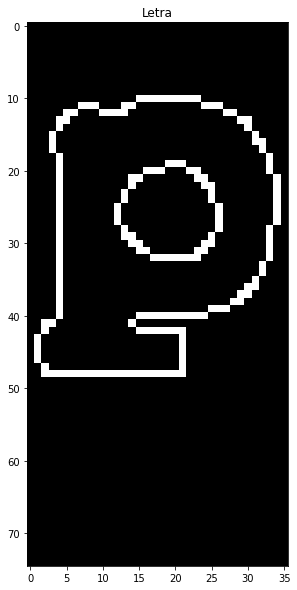

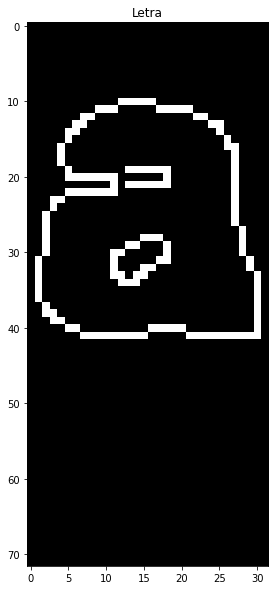

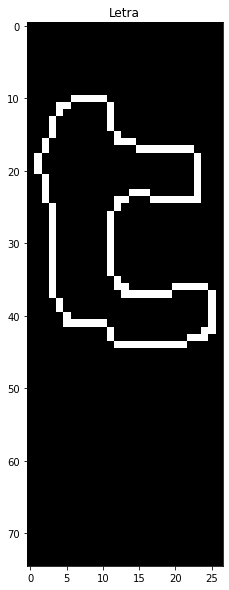

In [14]:
for idx, contour in enumerate(contours_filtered):
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = imagem_borda[y - 10:y + h + 30, x - 1:x + w + 1]
    cv2.imwrite(str(idx) + ".png", letter_image)
    cv2.rectangle(imagem_original, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    plt.figure(figsize=(20,10))
    plt.imshow(letter_image, cmap="gray")
    plt.title("Letra")